In [1]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Accuracy metrics 


In [12]:
df = pd.read_csv('Dataset/csv/finale_coords.csv')

In [13]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1234)

print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 612
Validation set size: 54
Test set size: 55


In [14]:
y_test

70                Jab
335        Right_Hook
456    Right_Uppercut
486    Right_Uppercut
339        Right_Hook
61                Jab
521             Guard
234         Left_Hook
64                Jab
492    Right_Uppercut
566             Guard
156          Straight
705              Idle
708              Idle
654              Idle
326        Right_Hook
319        Right_Hook
554             Guard
464    Right_Uppercut
29                Jab
126          Straight
713              Idle
83                Jab
426     Left_Uppercut
411     Left_Uppercut
720              Idle
552             Guard
621              Idle
416     Left_Uppercut
391     Left_Uppercut
631              Idle
403     Left_Uppercut
555             Guard
200         Left_Hook
352        Right_Hook
587             Guard
299        Right_Hook
356        Right_Hook
66                Jab
635              Idle
146          Straight
331        Right_Hook
410     Left_Uppercut
526             Guard
245         Left_Hook
176       

In [15]:
nan_values = df.isna().sum()
print(nan_values)

class    0
x1       0
y1       0
z1       0
v1       0
x2       0
y2       0
z2       0
v2       0
x3       0
y3       0
z3       0
v3       0
x4       0
y4       0
z4       0
v4       0
x5       0
y5       0
z5       0
v5       0
x6       0
y6       0
z6       0
v6       0
x7       0
y7       0
z7       0
v7       0
x8       0
y8       0
z8       0
v8       0
x9       0
y9       0
z9       0
v9       0
x10      0
y10      0
z10      0
v10      0
dtype: int64


# Pipeline of the classfication

In [16]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import *

In [17]:
model = make_pipeline(StandardScaler(), SVC(probability=True)).fit(X_train, y_train)
y_probs = model.predict_proba(X_train)

In [19]:
version = 5
with open(f'../Model/v{version}_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [43]:
y_pred = model.predict(X_train)


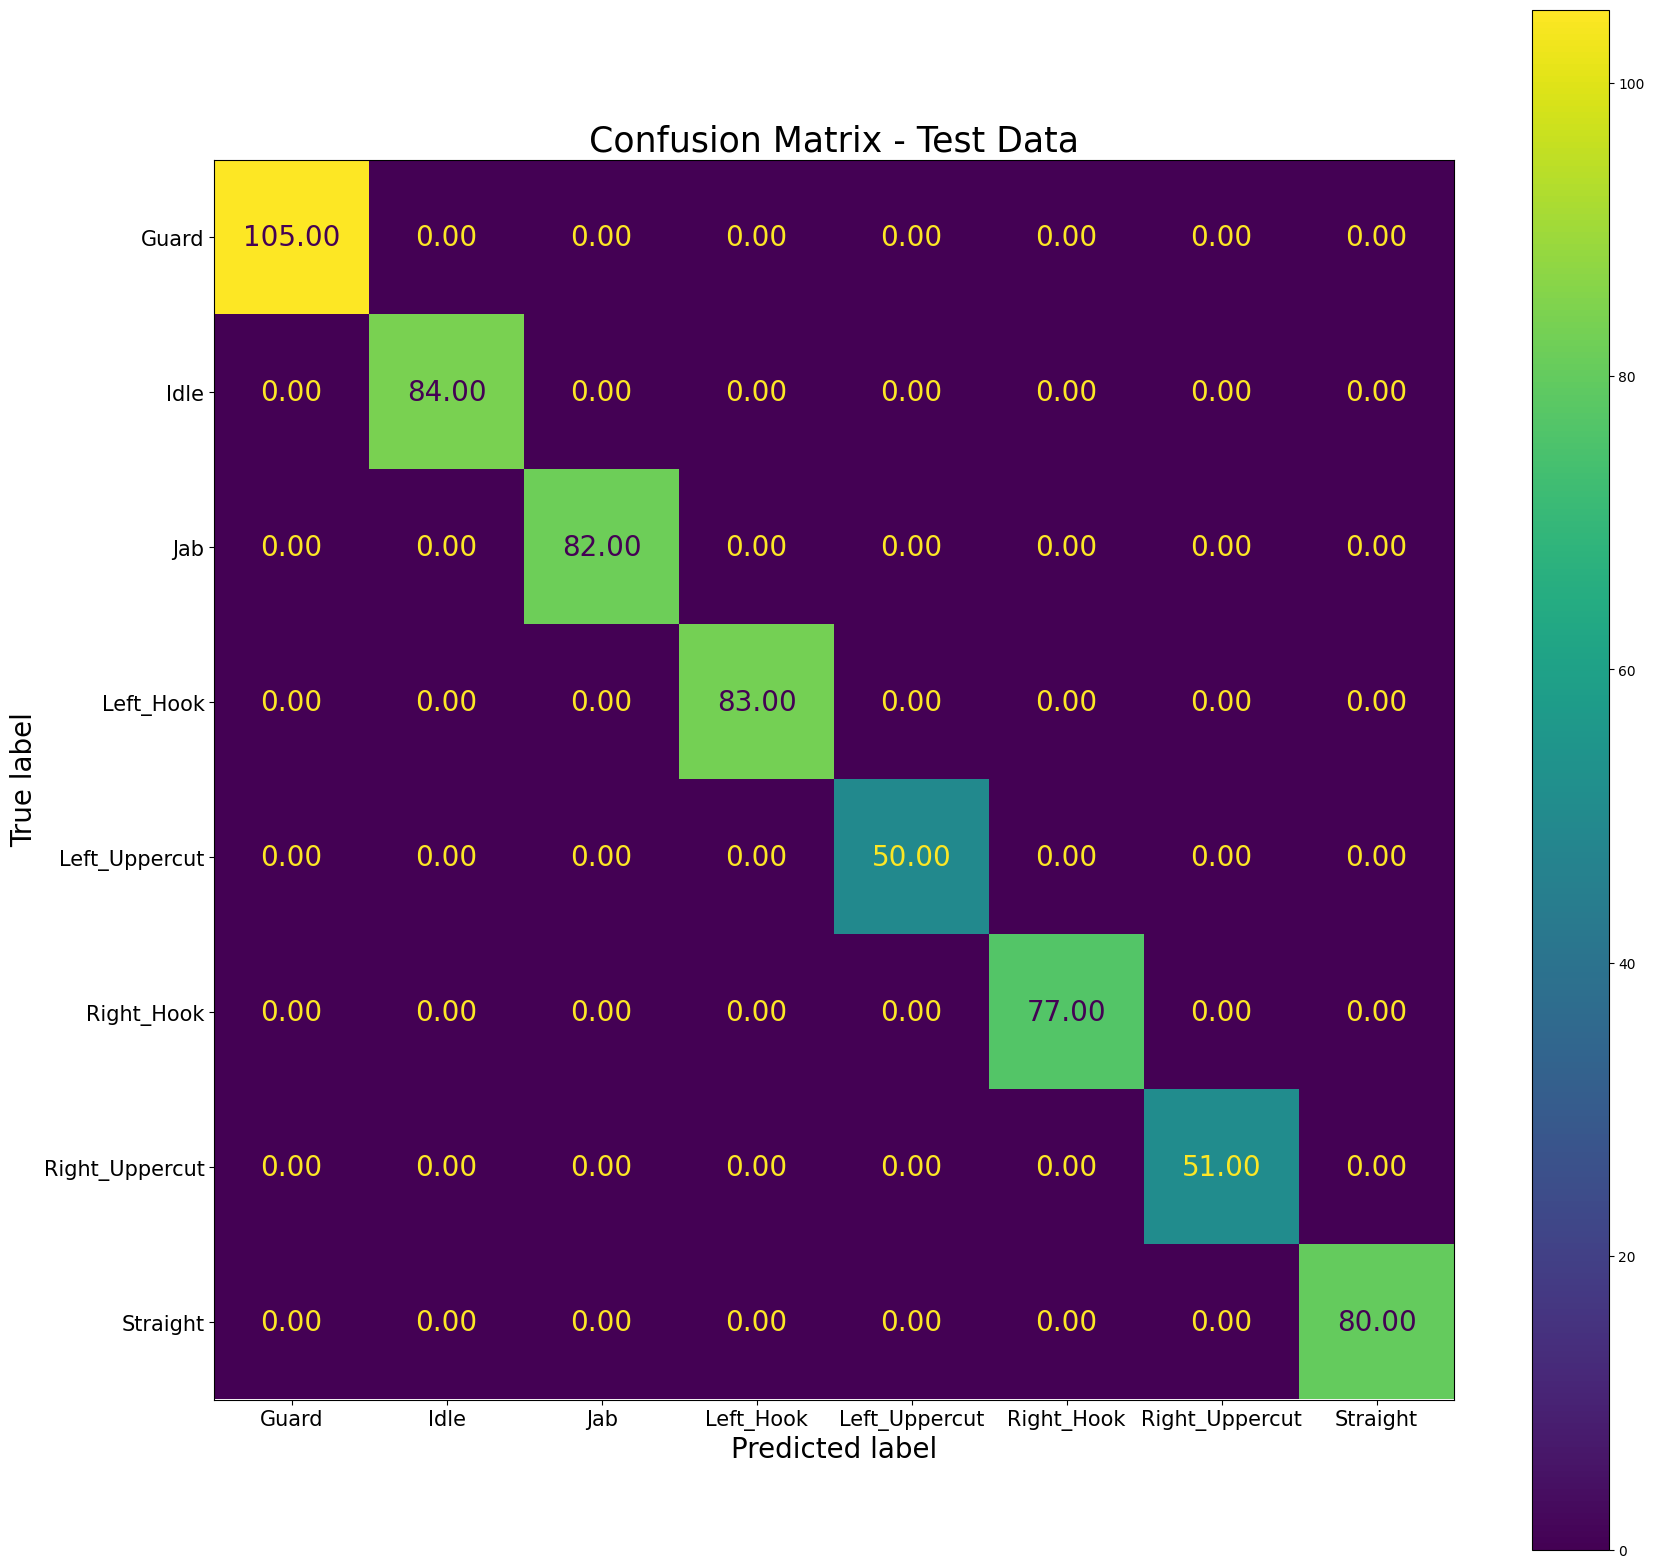

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Mengatur ukuran figure sebelum plotting confusion matrix
fig, ax = plt.subplots(figsize=(20, 20))  # Ubah ukuran sesuai keinginan

# Membuat display confusion matrix dan plot dengan ukuran teks yang lebih besar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax, cmap='viridis', values_format='.2f')

# Mengatur ukuran font untuk label sumbu, tick labels, dan judul
ax.set_xlabel('Predicted label', fontsize=20)
ax.set_ylabel('True label', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Confusion Matrix - Train Data', fontsize=25)

# Memperbesar angka dalam tabel
for texts in ax.texts:
    texts.set_fontsize(20)

# Menampilkan confusion matrix
plt.show()


WITH THRESHOLD

In [73]:
y_pred = (y_probs.max(axis=1) > 0.8).astype(int)

# Generate confusion matrix for thresholded predictions
cm = confusion_matrix(y_train, y_pred)
TP = cm[1, 1] if cm.shape[0] > 1 else 0
TN = cm[0, 0]
FP = cm[0, 1] if cm.shape[1] > 1 else 0
FN = cm[1, 0] if cm.shape[0] > 1 else 0

ValueError: Mix of label input types (string and number)

CONFUSSION MATRIX

In [62]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.8).astype(int)

In [63]:
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
TN, FP, FN, TP = cm.ravel()

print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

ValueError: invalid literal for int() with base 10: 'Left_Hook'

In [17]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [510, 46]

In [ ]:
# Menghitung metrik
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Menampilkan laporan klasifikasi untuk recall, precision, dan F1-score
report = classification_report(y_train, y_pred)
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

         Guard       0.99      1.00      0.99        86
          Idle       1.00      1.00      1.00        86
           Jab       1.00      0.98      0.99        65
     Left_Hook       1.00      1.00      1.00        62
 Left_Uppercut       1.00      1.00      1.00        44
    Right_Hook       1.00      1.00      1.00        59
Right_Uppercut       1.00      1.00      1.00        42
      Straight       1.00      1.00      1.00        66

      accuracy                           1.00       510
     macro avg       1.00      1.00      1.00       510
  weighted avg       1.00      1.00      1.00       510



In [18]:
import numpy as np

# Menyesuaikan ukuran figure
plt.figure(figsize=(20, 15))

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=True)

# Menyesuaikan ukuran font angka di dalam confusion matrix
for text in plt.gca().texts:
    text.set_fontsize(30)  # Atur ukuran font angka di matriks

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



NameError: name 'conf_matrix' is not defined

<Figure size 2000x1500 with 0 Axes>